## Plummer sphere

I hereby present the results of the snummulations done with `treecode` by Barnes and Hut and make a few considerations about the physics of the problem.

I decided to set a globular cluster with mass $M = 10^5 \ M_\odot$ and typical radius $r = 10$ pc, therefore we can calculate the values of $v$ 

### Free fall time

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.style.use('../../sim.mplstyle')

%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
sys.path.insert(1, '../')
import gdsam

In [3]:
N = '5e3'

inp = f'../../data/outputs/plummer{N}.txt'
pl = gdsam.plotter()
pl.get_data_tree(inp)

Loaded 5e+03 particles


In [4]:
from IPython.display import Video

Video(f'../media/plummer_{N}.mp4', width=600)

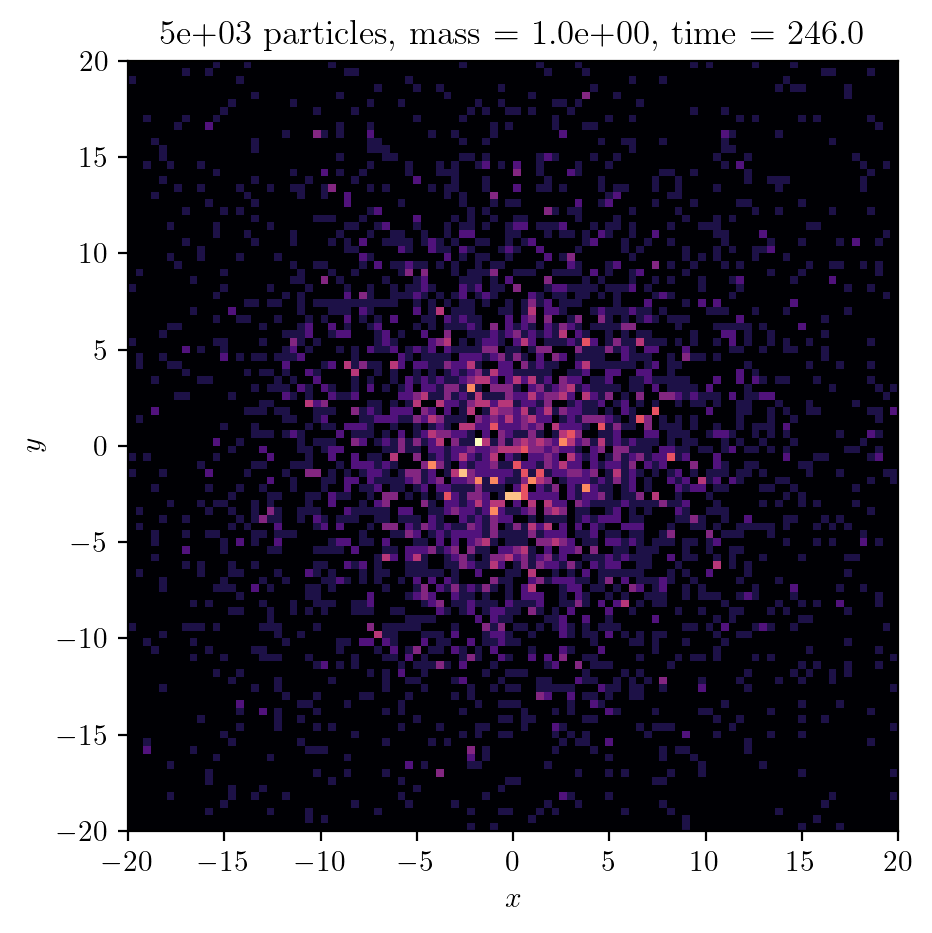

In [5]:
num = len(pl.t)-1
pl.positions_heatmap(num, 'xy', x_min = -20, y_min = -20, l=40);

### Conversion to physical units
I now show how one can move from IU to the physical units we will use from now on.

$1\ r_\mathrm{IU} = 1 \ \mathrm{pc}$ $\qquad$ $1\ M_\mathrm{IU} = 10^5 M_\odot$ $\qquad$ $1\ v_\mathrm{IU} = 6 \mathrm{km/s}$ $\qquad$ $t_\mathrm{IU} = r_\mathrm{IU}/v_\mathrm{IU} = (3\times 10^{13})/ 6\  s = 0.14\ \mathrm{Myr}$

In [6]:
conv = {}
conv['m'] = 1e5 #conversion factor for mass
conv['pos'] = 1 #conversion factor for radius
conv['vel'] = 6 #conversion factor for v
conv['t'] = 0.14 #conversion factor for time

pl.convert_values(conv)

### CoM

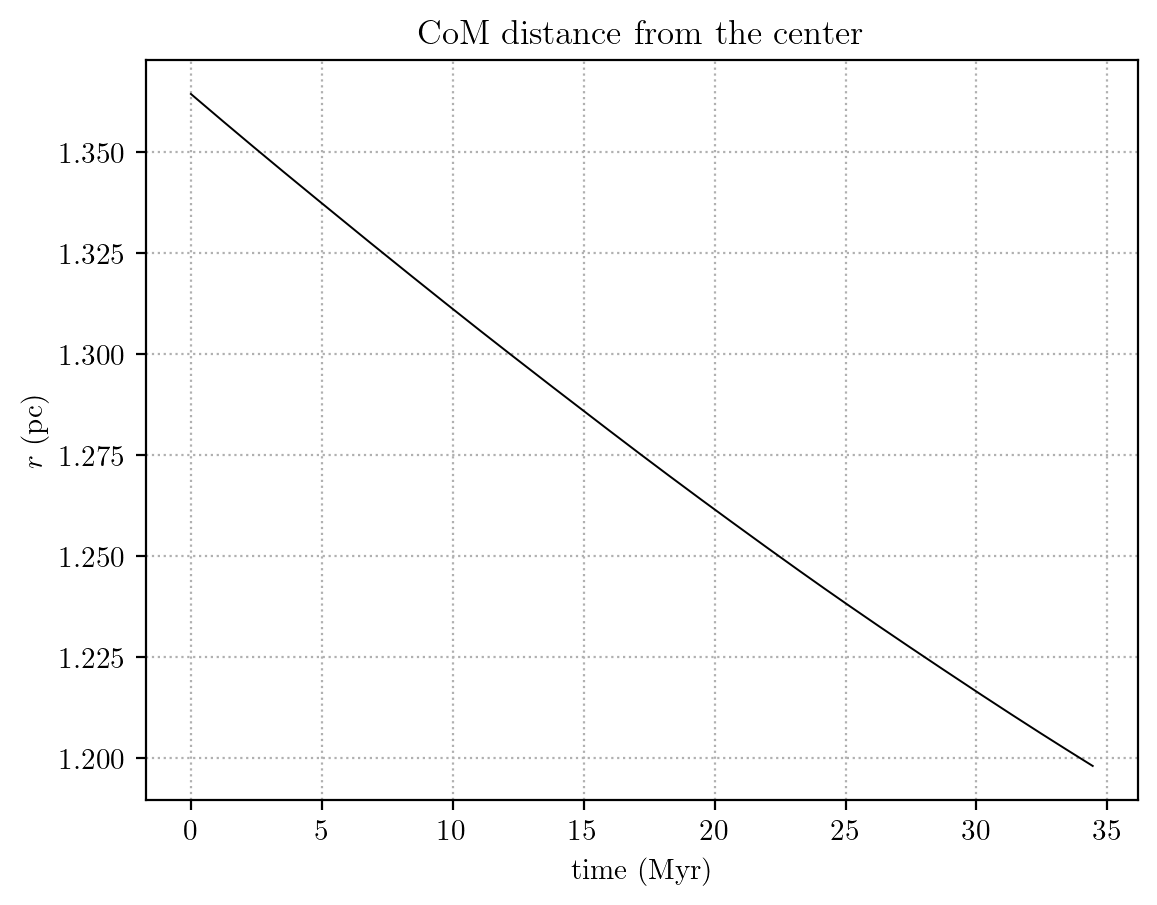

In [7]:
r_cm = gdsam.distance(pl.x_cm, pl.y_cm, pl.z_cm, 0, 0, 0)

plt.plot(pl.t, r_cm, lw=.7, c='k')

plt.title(r'CoM distance from the center')
plt.ylabel(r'$r$ (pc)')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel(r'time (Myr)')
plt.grid();


Should the center of mass position be fixed? Well, the density is not entirely homogeneous due to the discretization. Also, if you have a computation error on the forces, the center of mass will not experience any net force but it can acquire a constant velocity on some axis, due to the error on the position propagating.

### Checking density

Poissonian distribution?

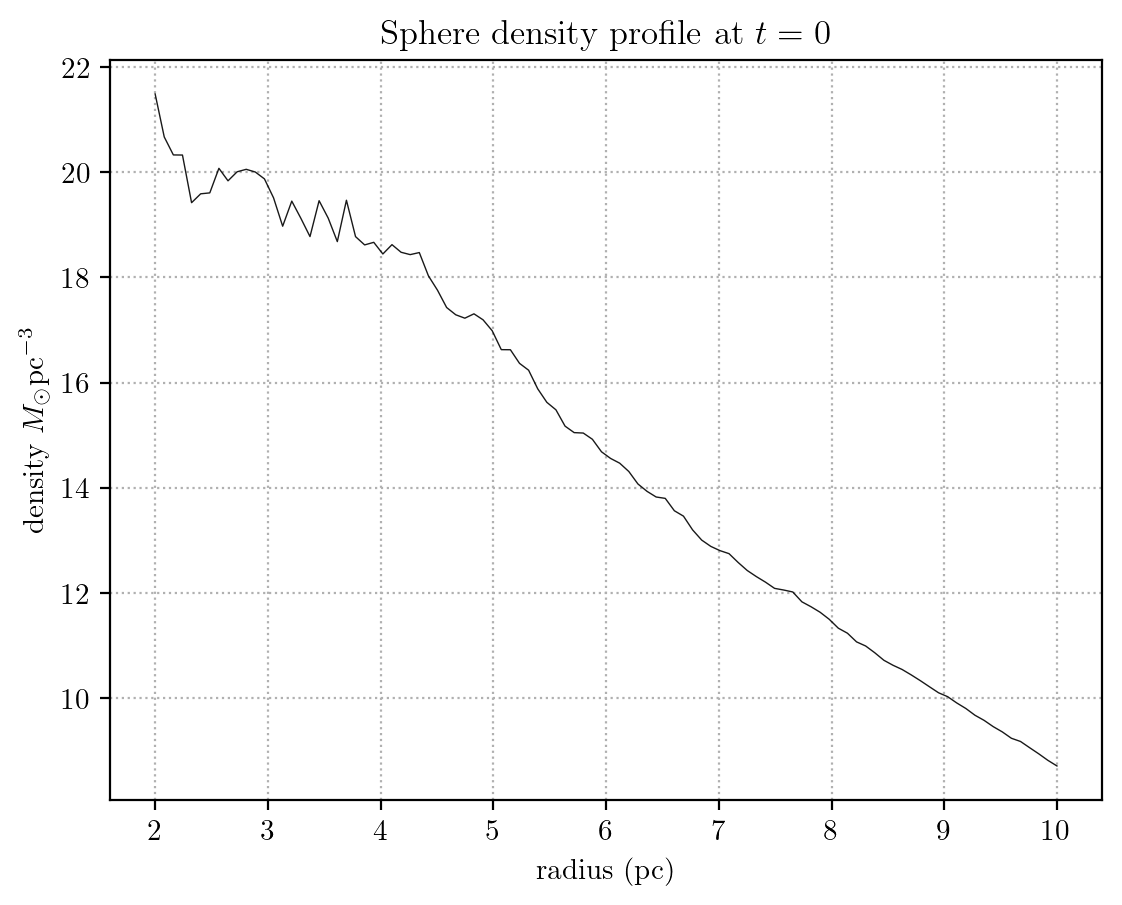

In [8]:
#Checking density
steps = 100
scan = np.linspace(2, 10, steps) #calculating densities at different radii

d = [pl.rho_mean_sphere(r_)[0] for r_ in scan]

plt.plot(scan, d, c='k', lw=.5, alpha=.9)
plt.title(r'Sphere density profile at $t=0$')
plt.ylabel(r'density $M_\odot\mathrm{pc^{-3}}$')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel(r'radius (pc)')
plt.grid()
#plt.legend()

### Density plot

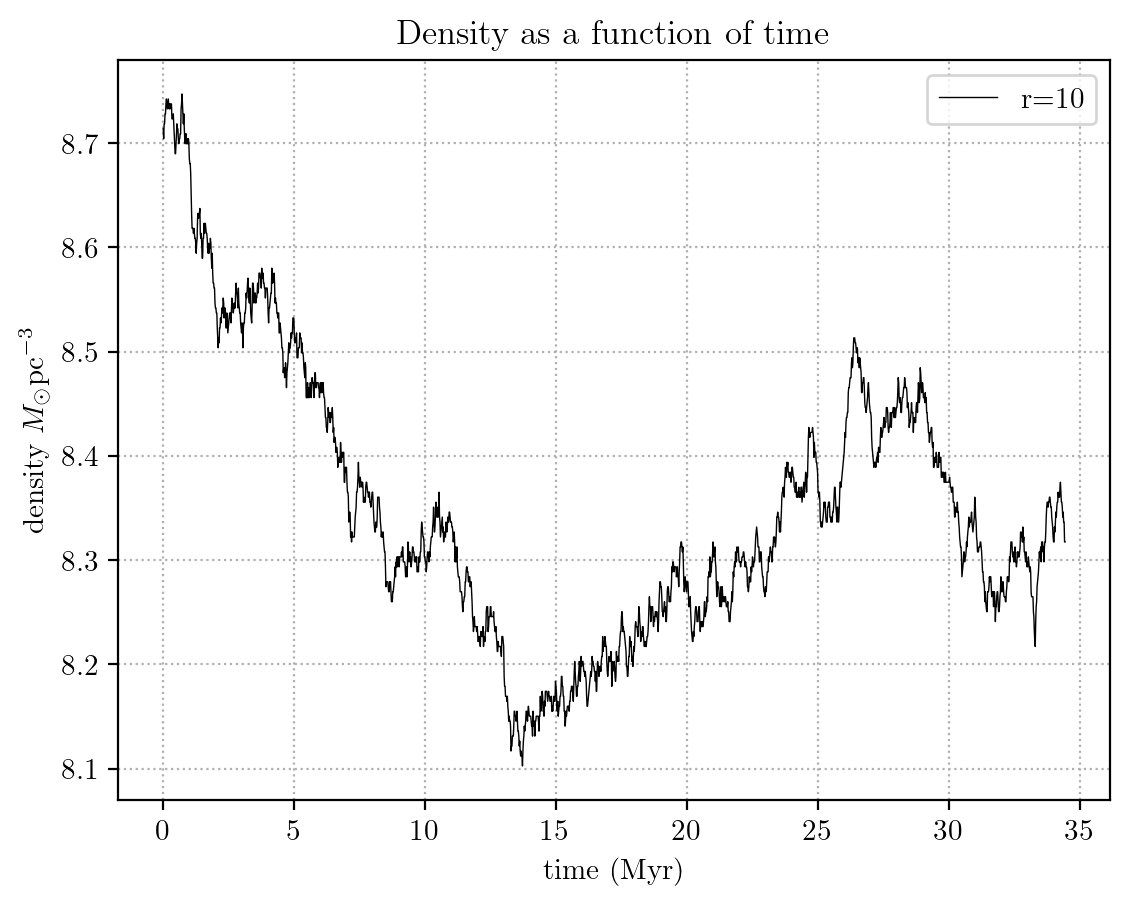

In [9]:
a=10
plt.plot(pl.t, pl.rho_mean_sphere(a), label=fr'r={a}', lw=.5, c='k')

plt.xlabel('time (Myr)')
plt.title('Density as a function of time')
plt.ylabel(r'density $M_\odot \mathrm{pc^{-3}}$')
plt.grid()
plt.legend();

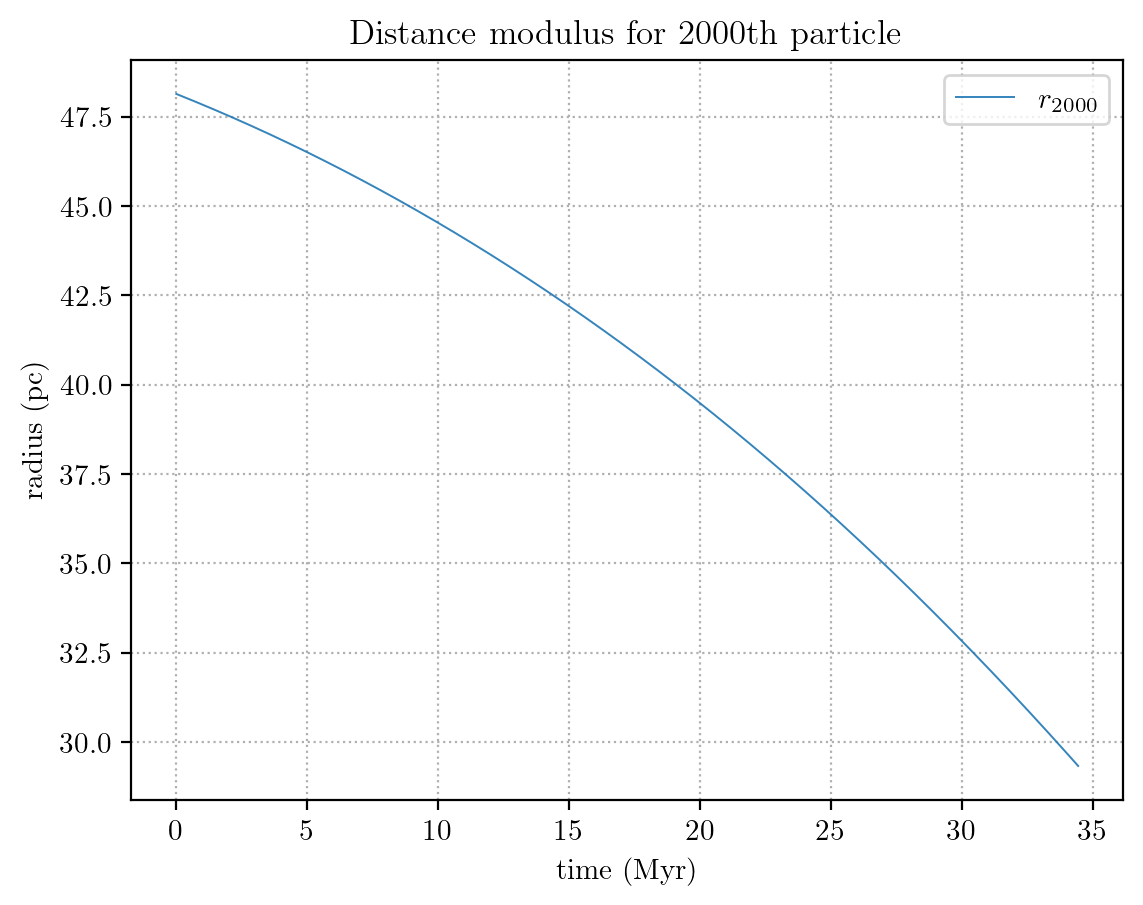

In [10]:
i=int(2e3)
plt.plot(pl.t, pl.r[i,:],lw=.7, alpha=.9,
         label=fr'$r_{{{i}}}$')

G =  4.3057e-3 #gravitational constant per 1 solar masses, 1pc, 1km/s


plt.xlabel('time (Myr)')
plt.title(fr'Distance modulus for {i}th particle')
plt.ylabel(r'radius (pc)')
plt.grid()
plt.legend();

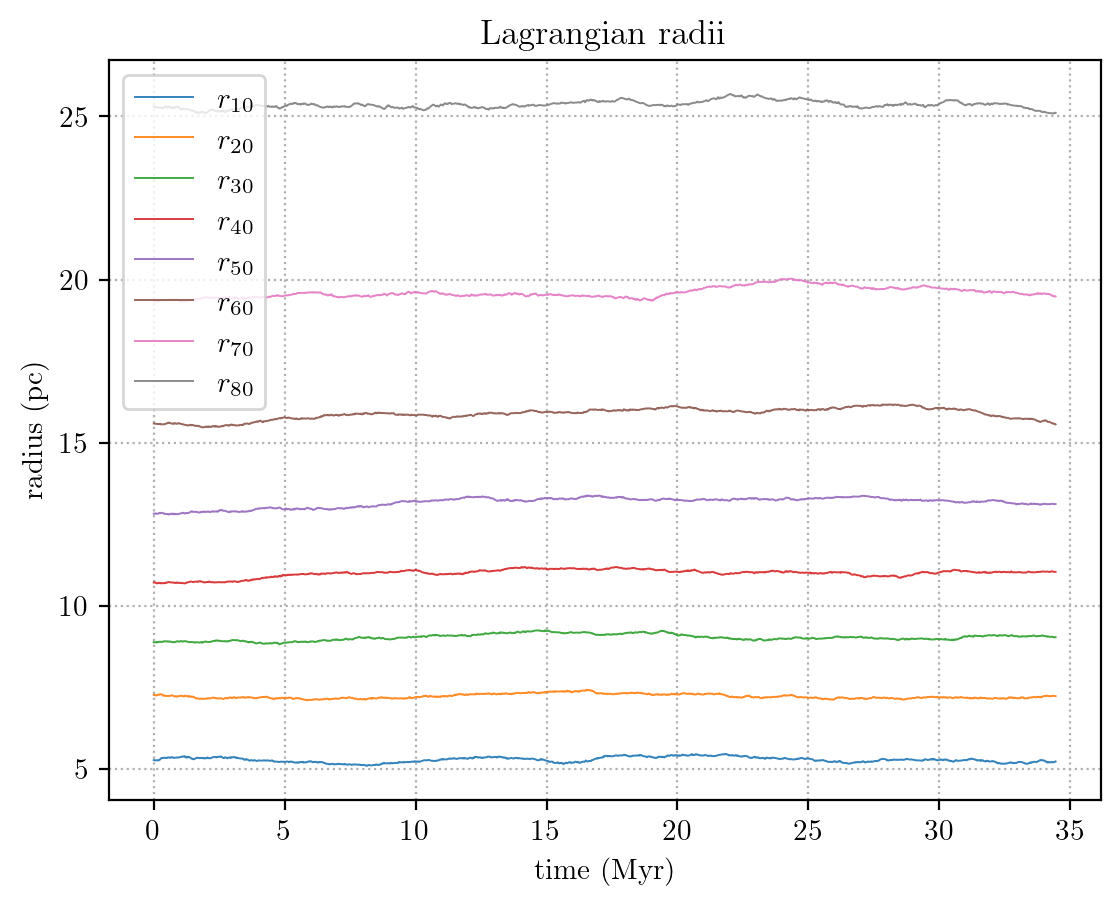

In [11]:
q = np.linspace(0.1,0.8,8)
t_i = [] #collapse time

for q_ in q:
    plt.plot(pl.t, pl.l_radii(q_),lw=.7, alpha=.9,
             label=fr'$r_{{{q_*100:n}}}$')
     

plt.xlabel('time (Myr)')
plt.title('Lagrangian radii')
plt.ylabel('radius (pc)')
plt.grid()
plt.legend(loc='upper left');

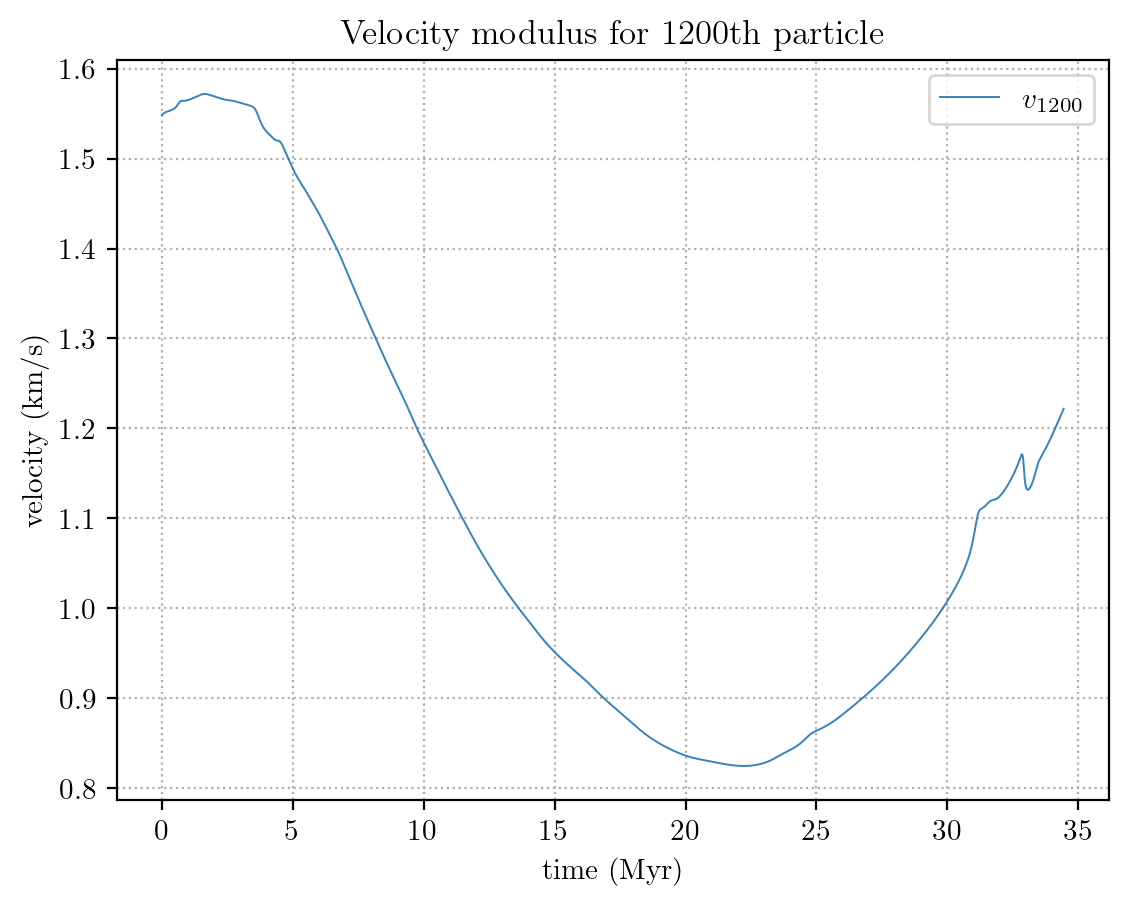

In [12]:
i=int(1.2e3)
plt.plot(pl.t, pl.v[i,:],lw=.7, alpha=.9,
         label=fr'$v_{{{i}}}$')

plt.xlabel('time (Myr)')
plt.title(f'Velocity modulus for {i}th particle')
plt.ylabel('velocity (km/s)')
plt.grid()
plt.legend();

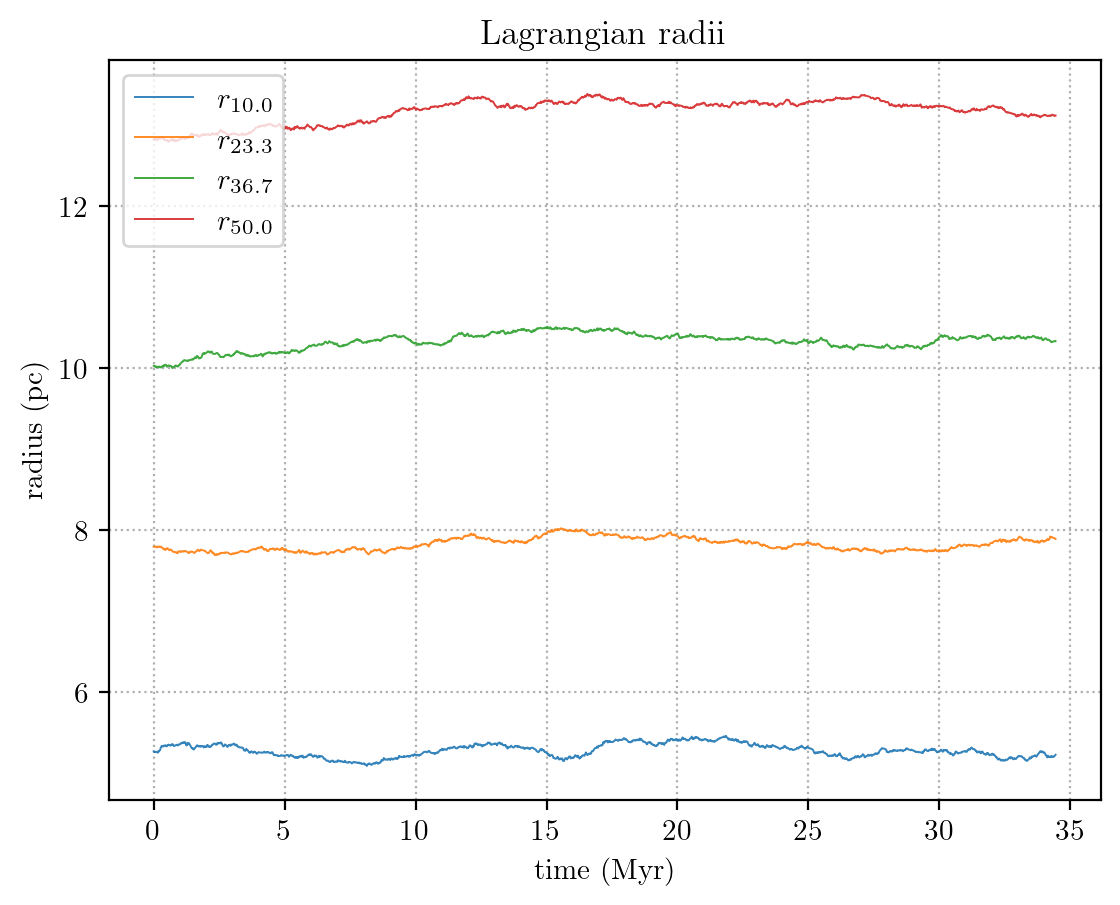

In [13]:
q = np.linspace(0.1,.5,4)
t_i = [] #collapse time

for q_ in q:
    plt.plot(pl.t, pl.l_radii(q_),lw=.7, alpha=.9,
             label=fr'$r_{{{q_*100:.1f}}}$')   

plt.xlabel('time (Myr)')
plt.title('Lagrangian radii')
plt.ylabel('radius (pc)')
plt.grid()
plt.legend(loc='upper left');

As time progresses the remnant keeps on contracting, the new cluster relaxes onto a new equilibrium configuration and gradually exchanges kinetic energy for potential energy. We can see that towards the end the radius seems to become constant. This is the result of the stable equilibrium, the remnant is not contracting anymore.

### Energy/Angular momentum conservation

In [14]:
d = pl.get_log_tree(f'../../data/outputs/plummer{N}_log.txt')
d.keys()

dict_keys(['time', '|T+U|', 'T', '-U', '-T/U', '|Vcom|', '|Jtot|', 'CPUtot'])

For the units of energy we need the following conversion:
E = $1\mathrm{erg}$ = $1\mathrm{g\cdot cm}^2 s^{-2}$ 
We have already done the conversion, so for our units
$$
E = 1\mathrm{M_\odot\cdot pc^2 Myr^{-2}} = \mathrm{2\times10^{33}g\cdot (3\times10^{18}\ cm)^2 (3.15\times 10^{7} \times 10^{6}\ s)^{-2}} = 2\times 10^{43}\ \mathrm{erg}
$$

$$
J = 1\mathrm{M_\odot\cdot pc^2 Myr^{-1}} = \mathrm{2\times10^{33}g\cdot (3\times10^{18}\ cm)^2 (3.15\times 10^{7} \times 10^{6}\ s)^{-1}} = 6\times 10^{56}\ \mathrm{erg\cdot s}
$$

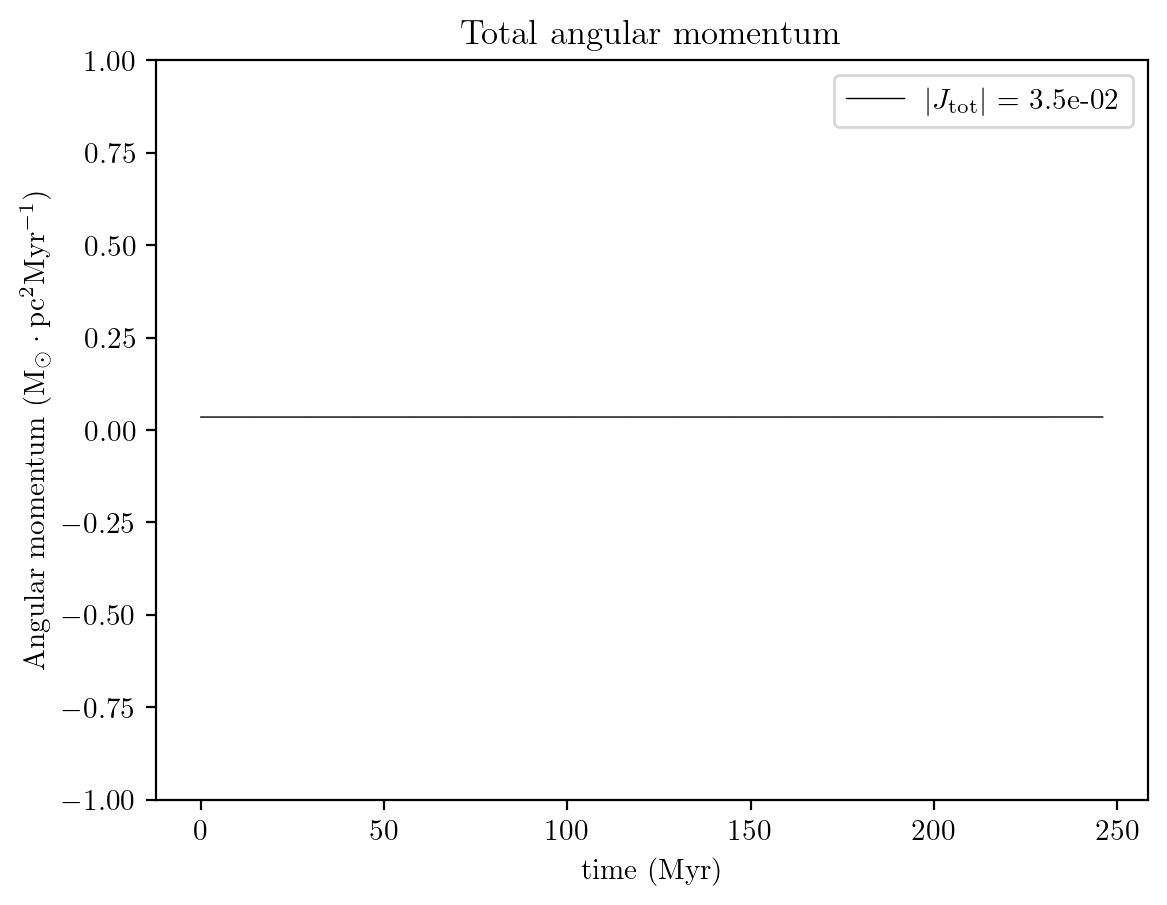

In [15]:
J = np.average(list(d['|Jtot|'].values()))

plt.plot(d['time'].values(),d['|Jtot|'].values(), lw=.5, c='k',
        label = fr'$|J_\mathrm{{tot}}|$ = {J:.1e}')
plt.title('Total angular momentum')
plt.ylim(-1,1)
plt.legend()
plt.xlabel(r'time (Myr)')
plt.ylabel(r'Angular momentum ($\mathrm{M_\odot\cdot pc^2 Myr^{-1}}$)');

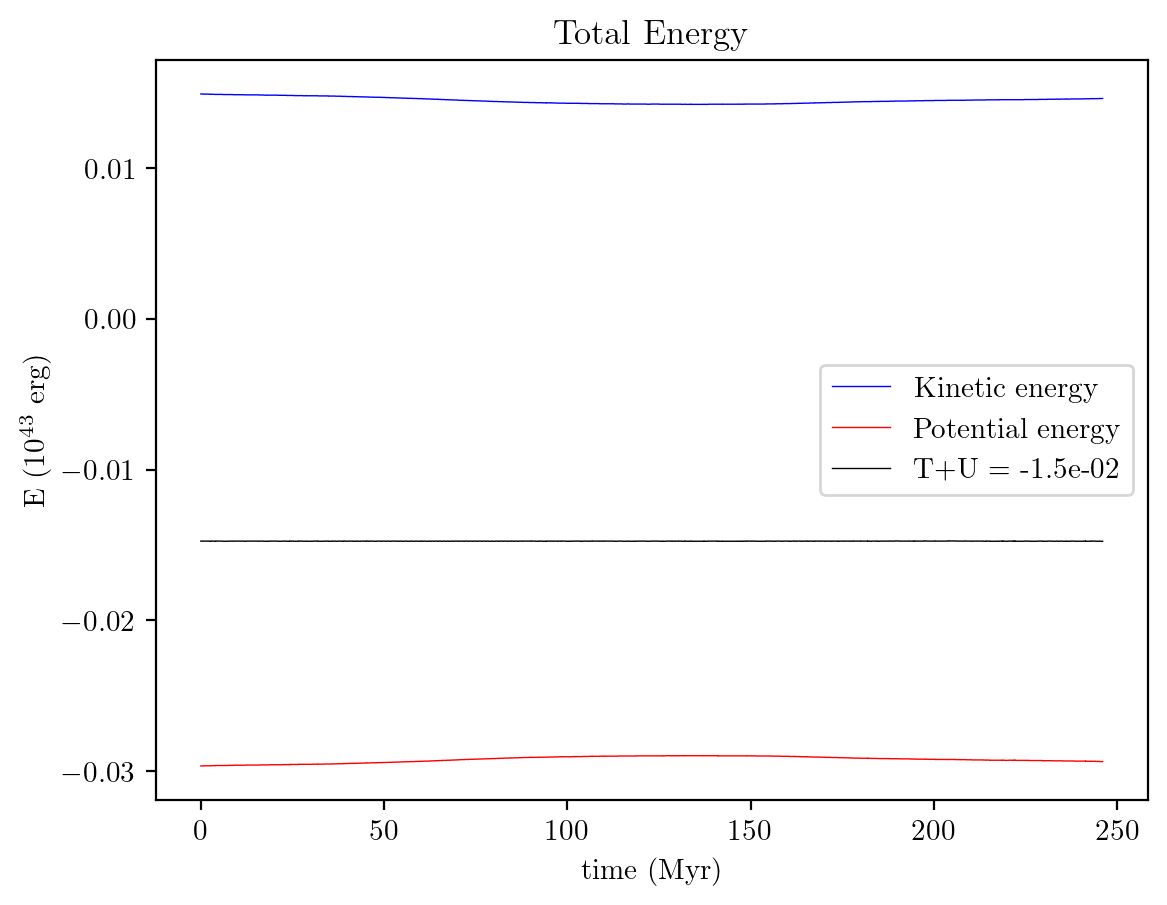

In [16]:
T = np.array([t for t in d['T'].values()])
U = np.array([-u for u in d['-U'].values()])

plt.plot(d['time'].values(),T, lw=.5, c='b', label='Kinetic energy')
plt.plot(d['time'].values(),U, lw=.5, c='r', label='Potential energy')
plt.plot(d['time'].values(),T+U, lw=.5, c='k', label=f'T+U = {np.average(T+U):.1e}')
plt.title('Total Energy')
plt.xlabel(r'time (Myr)')
plt.ylabel(r'E ($10^{43}$ erg)')


plt.legend();

(-0.1, 0.0)

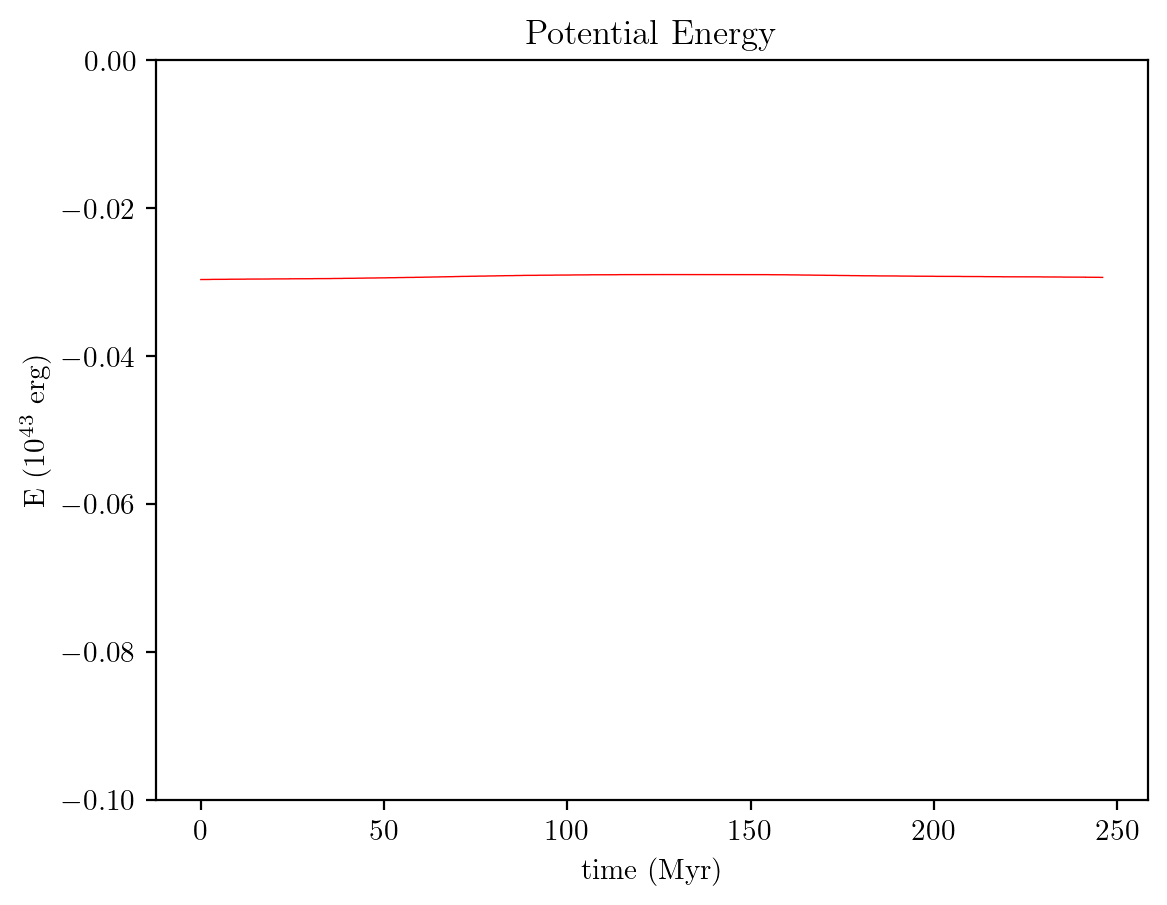

In [17]:
plt.plot(d['time'].values(),U, lw=.5, c='r')
plt.title('Potential Energy')
plt.xlabel(r'time (Myr)')
plt.ylabel(r'E ($10^{43}$ erg)')
plt.ylim(-.1,0)

We care to compare this with the potential of a plummer sphere

## Is the distribution rotating?
We need to calculate the components of the angular momentum of each single particle and then sum them altogether. We use the formula

$$ \vec L = m\vec v\times \vec r$$

Therefore $L_{z_i} = mv_{z_i}r_{z_i}$

In [18]:
L_x = []
L_y = []
L_z = []

for i in range(len(pl.t)):
    L_x.append(pl.m * pl.vy[:,i] * pl.y[:,i])
    L_y.append(pl.m * pl.vy[:,i] * pl.y[:,i])
    L_z.append(pl.m * pl.vz[:,i] * pl.z[:,i])


L_x, L_y, L_z = np.array(L_x), np.array(L_y), np.array(L_z) 

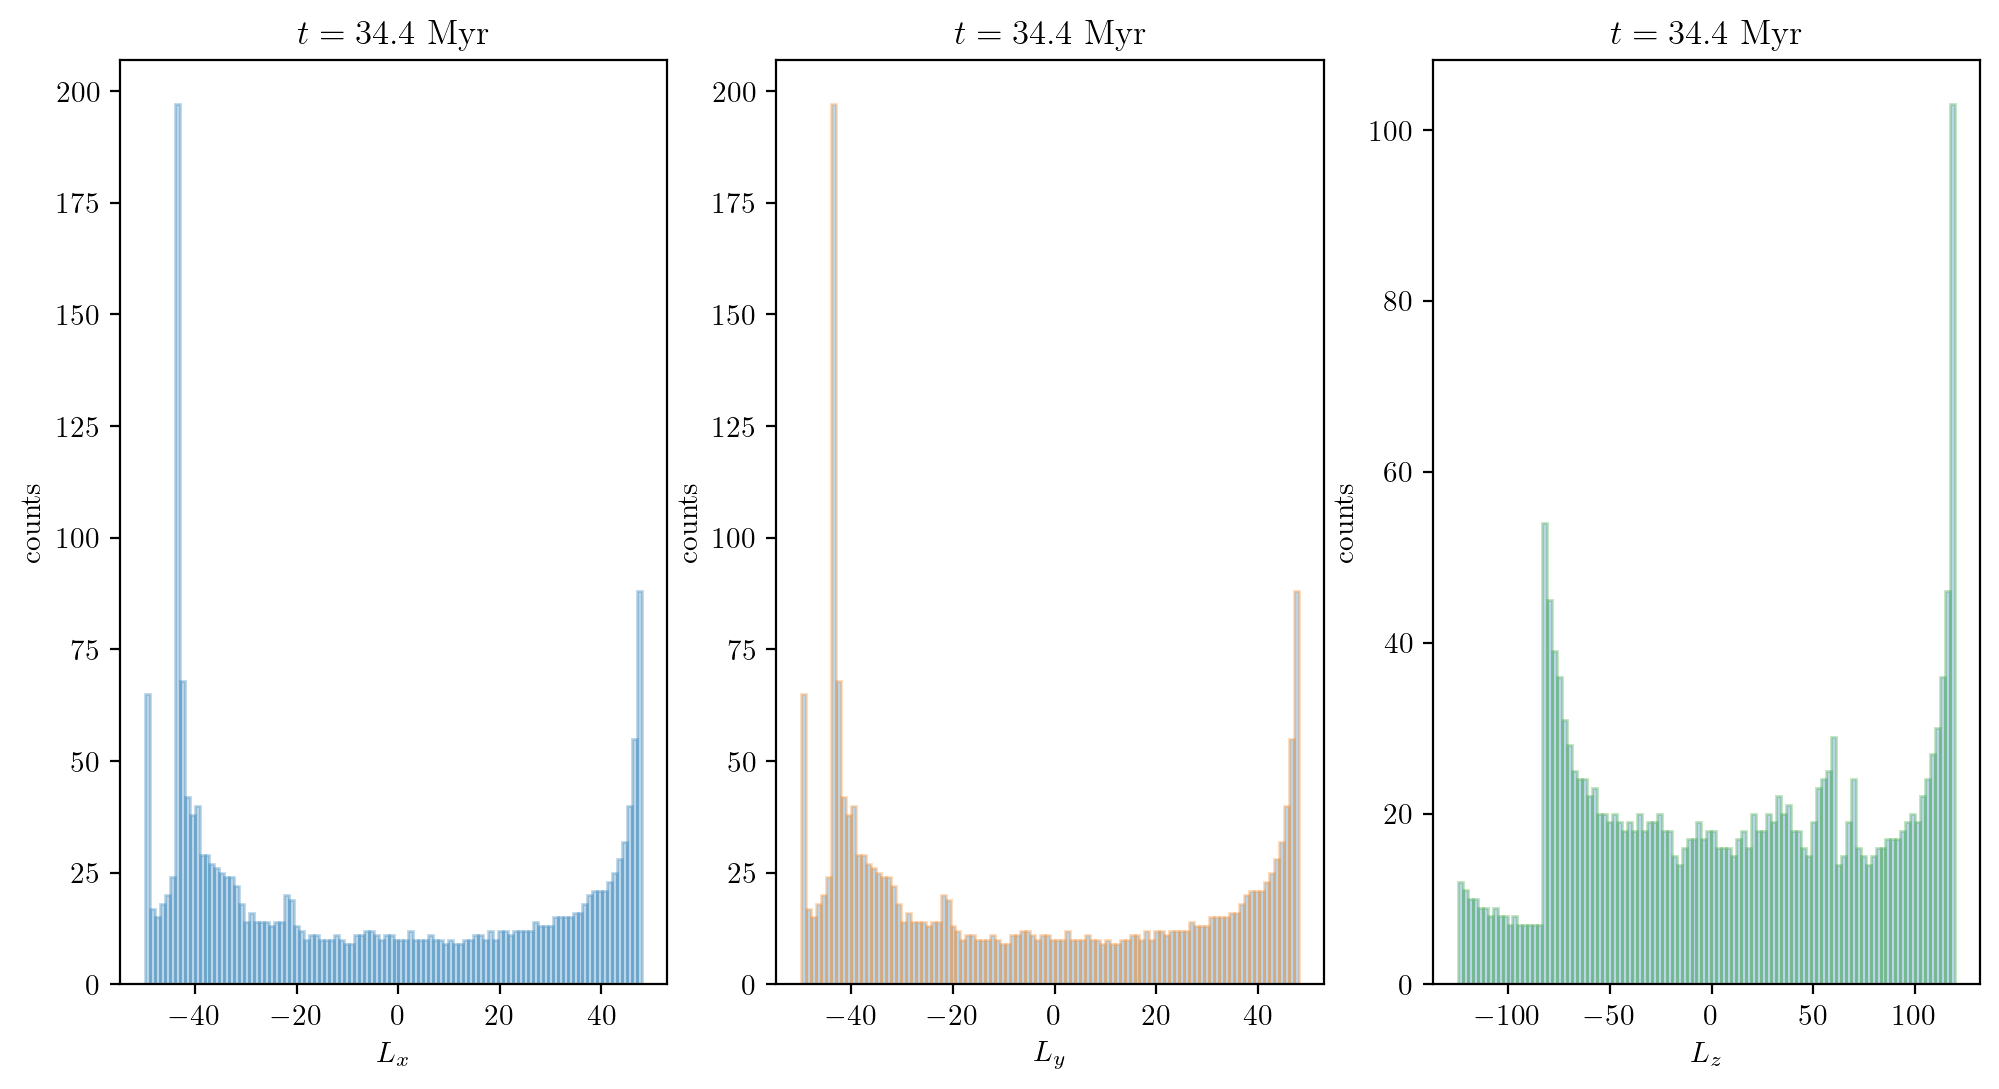

In [19]:
fig, axs = plt.subplots(1,3, figsize=(12,6))

num = -1
labels = ['L_x', 'L_y', 'L_z']

for i,ax in enumerate(axs):
    ax.set(title=fr'$t = {pl.t[num]:.1f} $ Myr', 
           xlabel=fr'${labels[i]}$', ylabel =fr'counts')

axs[0].hist(L_x[:, num], bins = 100, alpha =.3, edgecolor='C0')
axs[1].hist(L_y[:, num], bins = 100, alpha =.3, edgecolor='C1')
axs[2].hist(L_z[:, num], bins = 100, alpha =.3, edgecolor='C2');

### Orbits

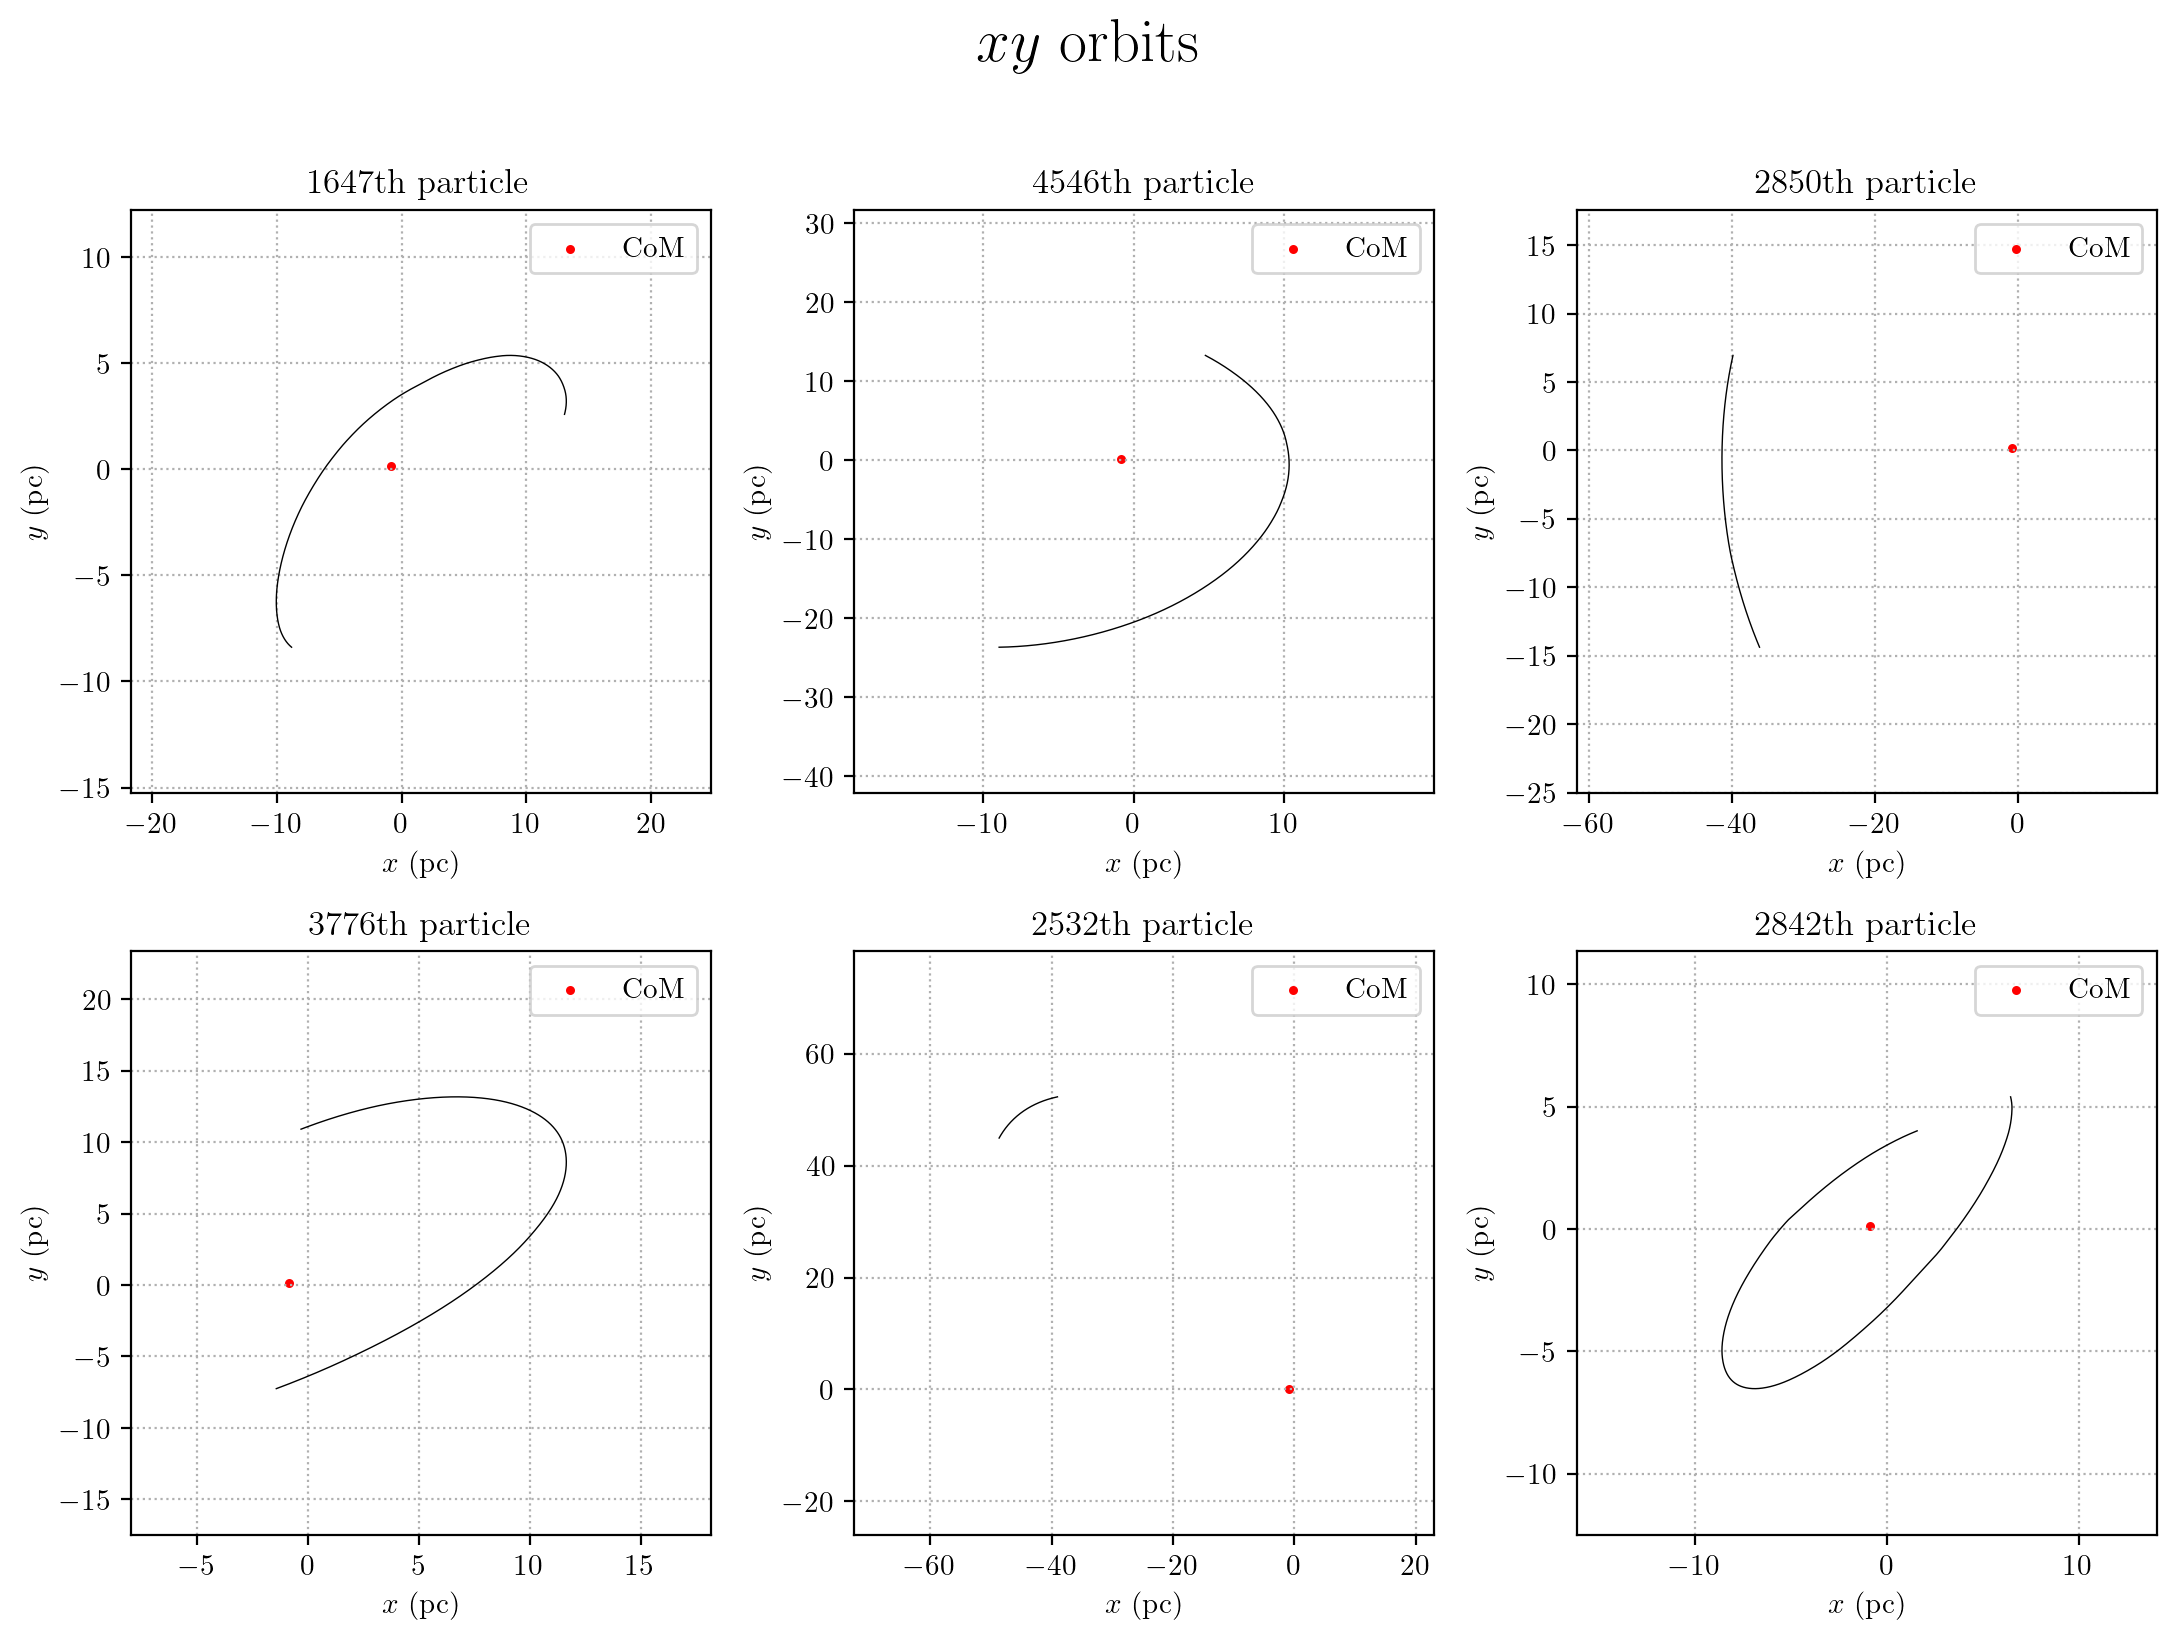

In [23]:
import random
fig, axs = plt.subplots(2,3, figsize=(11,8),tight_layout=True)

for ax in axs.flatten():
    i = random.choice(np.arange(0, int(float(N))))
    ax.plot(pl.x[i,:], pl.y[i,:], c='k')
    ax.scatter(pl.x_cm[0], pl.y_cm[0], c='r', s=5, label = 'CoM')
    ax.set_xlabel(r'$x$ (pc)')
    ax.set_ylabel(r'$y$ (pc)')
    ax.set_title(f'{i}th particle')
    ax.margins(.5)
    ax.grid()
    ax.legend()

fig.suptitle(r'$xy$ orbits', fontsize=22, y=1.02);


Orbits do not close. We want to calculate the epicyclic and the radial frequency and show that their ratio is irrational. 

We also would like to show the precession frequency by plotting $\Omega - k/2$

### Stability criterion : Jeans
To show that this system is stable we have to apply the Toomre stability criterion, that involves calculating the pressure and the gravitational force.

First we start with the generic stability criterion.

$$
    Q(R) = \dfrac{\sigma(R)\ k(R)}{G\ \Sigma(R)}
$$

with $k = $ epicyclic frequency, defined as the radial frequency of orbits, and calculated as

$$
    k^2 = \dfrac{\partial^2 \phi_\mathrm{eff}}{\partial R^2}\bigg|_{R=0,\ z=0} = R \dfrac{\partial}{\partial R}\Omega^2 + 4\Omega^2
$$

with $\Omega$ orbital frequency.

Then we have $\sigma$, the dispersion velocity

$$
    \sigma = \sqrt{v^2 - \left(\bar v\right)^2}
$$

and $\Sigma$ the surface density.

We can easily calculate $k$ and we already have all the other variables. We can therefore estimate the Toomre Parameter as a function of the radius.